# 合并表格

In [1]:
import numpy as np
import pandas as pd

# ### 读取
# trd_dalyr0=pd.read_excel("stockData/furtherInformation/日个股回报率文件185043337(仅供中央财经大学使用)/TRD_Dalyr.xlsx")
# trd_dalyr0=trd_dalyr0.drop([0,1],axis=0)
# trd_dalyr1=pd.read_excel("stockData/furtherInformation/日个股回报率文件185043337(仅供中央财经大学使用)/TRD_Dalyr1.xlsx")
# trd_dalyr1=trd_dalyr1.drop([0,1],axis=0)
# trd_dalyr2=pd.read_excel("stockData/furtherInformation/日个股回报率文件185043337(仅供中央财经大学使用)/TRD_Dalyr2.xlsx")
# trd_dalyr2=trd_dalyr2.drop([0,1],axis=0)
# trd_dalyr3=pd.read_excel("stockData/furtherInformation/日个股回报率文件185043337(仅供中央财经大学使用)/TRD_Dalyr3.xlsx")
# trd_dalyr3=trd_dalyr3.drop([0,1],axis=0)
# trd_dalyr4=pd.read_excel("stockData/furtherInformation/日个股回报率文件185043337(仅供中央财经大学使用)/TRD_Dalyr4.xlsx")
# trd_dalyr4=trd_dalyr4.drop([0,1],axis=0)
# diaryData=[trd_dalyr0,trd_dalyr1,trd_dalyr2,trd_dalyr3,trd_dalyr4]
# finalDF=pd.concat(diaryData)
# finalDF

In [2]:
# companyData=pd.read_excel("stockData/furtherInformation/公司文件184301535(仅供中央财经大学使用)/TRD_Co.xlsx")
# companyData=companyData.drop([0,1],axis=0)
# companyData

In [3]:
# companyAssetData=pd.read_excel("stockData/furtherInformation/资产负债表(联表查询)181028530/FS_Combas(Merge Query).xlsx")
# companyAssetData=companyAssetData.drop([0,1],axis=0)
# companyAssetData

In [4]:
# ### 去除b部分
# companyAssetData=companyAssetData[companyAssetData["FS_Combas.Typrep"]!="B"]
# companyAssetData=companyAssetData.reindex()
# ### 去除12-31，因为与1-1有重复
# companyAssetData=companyAssetData[companyAssetData['FS_Combas.Accper'].str.contains("01-01|03-31|06-30|09-30")]
# companyAssetData['FS_Combas.Accper']=pd.to_datetime(companyAssetData['FS_Combas.Accper'], format="%Y-%m-%d")
# 
# companyAssetData=companyAssetData.rename(columns={"FS_Combas.Stkcd":"Stkcd","FS_Combas.Accper":"Trddt_quarter"})
# companyAssetData

In [5]:
# ### todo：开始合并 日个股回报与公司信息
# df=pd.merge(finalDF,companyData,on='Stkcd')
# df['Trddt']=pd.to_datetime(df["Trddt"], format="%Y-%m-%d")
# df

In [6]:
###转换时间为季度
def dateToQuarter(date):
        # print("time: ",date)
        quarter_date={1:"01-01",2:"03-31",3:"06-30",4:"09-30"}
        year=date.astype('datetime64[Y]').astype(int) + 1970
        month = date.astype('datetime64[M]').astype(int) % 12 + 1
        the_quarter = (month - 1) // 3 + 1                  #计算季度
        quarter_name = str(year) + '年' + str(the_quarter) + '季度'
        quarter_name_short = str(year) + 'Q' + str(the_quarter)
        # print("quarter time: ",quarter_name)
        return [str(year)+"-"+quarter_date[the_quarter],the_quarter]

# dateToQuarter(numpy.datetime64("2020-04-30"))

In [7]:
# df["Trddt_quarter"]=[dateToQuarter(i)[0] for i in df['Trddt'].values]
# df["Trddt_quarter"]=pd.to_datetime(df["Trddt_quarter"], format="%Y-%m-%d")
# df

In [8]:
# ###todo：根据季度与股票代码合并之前的总表与资产负债表
# allData=pd.merge(df,companyAssetData,on=["Stkcd",'Trddt_quarter'],how='outer')
# # allData['Stkcd']=allData['Stkcd'].astype(str)
# allData

In [9]:
# allData.to_csv("stockData/furtherInformation/AllData.csv")

# 读取疫情数据并合并表格

In [10]:
covidData=pd.read_csv("stockData/furtherInformation/covid19/CovidNews01.csv")
covidData['Public_Time']=pd.to_datetime(covidData["Public_Time"], format="%Y-%m-%d")
covidData

,Title,Link,Content,Public_Time,Source
0,1月23日新型冠状病毒感染的肺炎疫情情况,http://www.nhc.gov.cn/yjb/s3578/202001/5d19a4f...,截至1月22日24时，我委收到国内25个省（区、市）累计报告新型冠状病毒感染的肺炎确诊病例5...,2020-01-23,卫生应急办公室
1,1月22日新型冠状病毒感染的肺炎疫情情况,http://www.nhc.gov.cn/yjb/s3578/202001/a3c8b51...,2020年1月21日0-24时，我委收到国内13省（区、市）报告新增新型冠状病毒感染的肺炎确...,2020-01-22,卫生应急办公室
2,1月21日新型冠状病毒感染的肺炎疫情情况,http://www.nhc.gov.cn/yjb/s3578/202001/930c021...,2020年1月20日0-24时，我委收到国内3省（区、市）报告新增新型冠状病毒感染的肺炎确诊...,2020-01-21,卫生应急办公室
3,1月24日新型冠状病毒感染的肺炎疫情情况,http://www.nhc.gov.cn/yjb/s3578/202001/c5da49c...,1月23日0-24时，27个省（区、市）报告新增确诊病例259例，新增死亡患者8例。新增治愈...,2020-01-24,卫生应急办公室
4,截至11月26日24时新型冠状病毒肺炎疫情最新情况,http://www.nhc.gov.cn/yjb/s7860/202111/322b052...,11月26日0—24时，31个省（自治区、直辖市）和新疆生产建设兵团报告新增确诊病例25例。...,2021-11-27,卫生应急办公室
...,...,...,...,...,...
881,截至9月30日24时新型冠状病毒肺炎疫情最新情况,http://www.nhc.gov.cn/yjb/s7860/202110/0a5882f...,9月30日0—24时，31个省（自治区、直辖市）和新疆生产建设兵团报告新增确诊病例34例。其...,2021-10-01,卫生应急办公室
882,截至10月4日24时新型冠状病毒肺炎疫情最新情况,http://www.nhc.gov.cn/yjb/s7860/202010/9fac34d...,10月4日0—24时，31个省（自治区、直辖市）和新疆生产建设兵团报告新增确诊病例20例，均...,2020-10-05,卫生应急办公室
883,截至10月4日24时新型冠状病毒肺炎疫情最新情况,http://www.nhc.gov.cn/yjb/s7860/202110/cfe33a2...,10月4日0—24时，31个省（自治区、直辖市）和新疆生产建设兵团报告新增确诊病例26例，均...,2021-10-05,卫生应急办公室
884,截至10月6日24时新型冠状病毒肺炎疫情最新情况,http://www.nhc.gov.cn/yjb/s7860/202010/2bf38d3...,10月6日0—24时，31个省（自治区、直辖市）和新疆生产建设兵团报告新增确诊病例7例，均为...,2020-10-07,卫生应急办公室


In [11]:
print(covidData.shape)
print(len(covidData['Link'].unique()))
print(len(covidData['Public_Time'].unique()))

(886, 5)
886
886


In [12]:
from jieba import analyse

# print("title: ",covidData['Title'].values[0])
# for para in covidData['Content'].values[0].split("\n"):
#     if para.strip()!="":
#         print("-----------------------")
#         print(para.strip())
#         keywords = analyse.extract_tags(para.strip(),withWeight=False)
#         print("tf-idf筛选：",keywords)

In [13]:
print(covidData['Title'].values[4])
print(covidData['Content'].values[4])

截至11月26日24时新型冠状病毒肺炎疫情最新情况
11月26日0—24时，31个省（自治区、直辖市）和新疆生产建设兵团报告新增确诊病例25例。其中境外输入病例20例（上海5例，广东3例，云南3例，山东2例，湖南2例，广西2例，天津1例，辽宁1例，河南1例），含4例由无症状感染者转为确诊病例（湖南2例，河南1例，广西1例）；本土病例5例（辽宁3例，均在大连市；云南2例，均在德宏傣族景颇族自治州）。无新增死亡病例。无新增疑似病例。
当日新增治愈出院病例76例，解除医学观察的密切接触者1858人，重症病例较前一日减少1例。
境外输入现有确诊病例390例（其中重症病例3例），现有疑似病例2例。累计确诊病例10111例，累计治愈出院病例9721例，无死亡病例。
截至11月26日24时，据31个省（自治区、直辖市）和新疆生产建设兵团报告，现有确诊病例809例（其中重症病例7例），累计治愈出院病例93163例，累计死亡病例4636例，累计报告确诊病例98608例，现有疑似病例2例。累计追踪到密切接触者1319872人，尚在医学观察的密切接触者30826人。
31个省（自治区、直辖市）和新疆生产建设兵团报告新增无症状感染者15例（均为境外输入）；当日转为确诊病例4例（均为境外输入）；当日解除医学观察21例（境外输入13例）；尚在医学观察的无症状感染者439例（境外输入370例）。
累计收到港澳台地区通报确诊病例29064例。其中，香港特别行政区12421例（出院12128例，死亡213例），澳门特别行政区77例（出院77例），台湾地区16566例（出院13742例，死亡848例）。


（注：媒体引用时，请标注“信息来自国家卫生健康委员会官方网站”。）


# 数据去重，并且删除部分缺失值

In [14]:
# allData=pd.read_csv("stockData/furtherInformation/AllData.csv",index_col=0,dtype=object)
# allData['Trddt']=pd.to_datetime(allData["Trddt"], format="%Y-%m-%d")
# allData

In [15]:
# ###todo：要删除的重复列名
# deleteColumns=["Trddt_quarter","FS_Combas.Typrep","FS_Combas.ShortName","csmar_listedcoinfo.Stknme","csmar_listedcoinfo.Conme","FS_Comscfd.ShortName","FS_Comins.ShortName","csmar_listedcoinfo.Conme_en","csmar_listedcoinfo.Nnindcd","csmar_listedcoinfo.PROVINCECD","csmar_listedcoinfo.CITY","csmar_listedcoinfo.Nnindnme"]
# afterDeleteData=allData[[i for i in allData.columns if i not in deleteColumns]]
# afterDeleteData

In [16]:
# afterDeleteData.to_csv("stockData/furtherInformation/afterDeleteData.csv")

In [17]:
# ### 检查是否有缺失值达到50%的，有的话就删除
# totalNumRows=5000412
# num = afterDeleteData.isna().sum()
# indexs=[]
# nullNums=[]
# nullPerc=[]
# for index in num.index:
#     indexs.append(index)
#     nullNums.append(num[index])
#     nullPerc.append(str(round(float(num[index]/totalNumRows),3)*100)+" %")
# 
# num=pd.DataFrame.from_dict({"Variance":indexs,"Number Of Null":nullNums,"Percentage Of Null":nullPerc})
# num

In [18]:
# ###todo：删除和处理回归不能输入的数据,删除回报率为null的行,同时删除缺失值过多的 [FS_Combas.A001127000,FS_Combas.A001220000,FS_Combas.A001219000,FS_Combas.A001109000] 列
# uselessColumns=["FS_Combas.A001127000","FS_Combas.A001220000","FS_Combas.A001219000","FS_Combas.A001109000","Stknme","Listdt","csmar_listedcoinfo.BUSSINESSRANGE","Conme_en","PROVINCECODE","Parvcur","csmar_listedcoinfo.MAINBUSSINESS","CITYCODE","PROVINCE","Cuntrycd","Conme","Nindcd","Nindcd","Nnindcd","OWNERSHIPTYPECODE","Opnprc","Hiprc","Loprc","Clsprc","Indcd","csmar_listedcoinfo.OWNERSHIPTYPE","Markettype","Sctcd"]
# 
# uselessDeletedDf=allData[[i for i in allData.columns if i not in deleteColumns and i not in uselessColumns]]
# uselessDeletedDf=uselessDeletedDf.dropna()
# uselessDeletedDf

In [19]:
###查看并确定目前的数据类型
# print("占有类型： ",uselessDeletedDf["OWNERSHIPTYPE"].unique())
# print("财产类型：",uselessDeletedDf["csmar_listedcoinfo.EquityNature"].unique())
# print("产业类型：",uselessDeletedDf["Indnme"].unique())
# print("产业细分1：",uselessDeletedDf["Nindnme"].unique())
# print("产业细分2：",uselessDeletedDf["Nnindnme"].unique())
# print("公司所在地区：",uselessDeletedDf["CITY"].unique())

In [20]:
# uselessDeletedDf.to_csv("stockData/furtherInformation/Input.csv",index=False)

# 数据转换 与 回归

In [21]:
uselessDeletedDf=pd.read_csv("stockData/furtherInformation/Input.csv")
uselessDeletedDf

,Stkcd,Trddt,ChangeRatio,Indnme,Nindnme,Nnindnme,CITY,OWNERSHIPTYPE,FS_Combas.A001111000,FS_Combas.A001123000,...,csmar_listedcoinfo.EquityNature,FS_Comins.B001100000,FS_Comins.B001200000,FS_Comins.B001209000,FS_Comins.B001210000,FS_Comins.B001211000,FS_Comins.B002000000,FS_Comscfd.C001000000,FS_Comscfd.C002000000,FS_Comscfd.C003000000
0,2,2019-01-02,0.003359,房地产,房地产业,房地产业,深圳市,国营或国有控股,1.586181e+09,7.503026e+11,...,国企,2.976793e+11,2.344338e+11,7.868076e+09,1.034081e+10,5.998575e+09,4.927229e+10,3.361818e+10,-6.736444e+10,4.479765e+10
1,2,2019-01-03,0.007113,房地产,房地产业,房地产业,深圳市,国营或国有控股,1.586181e+09,7.503026e+11,...,国企,2.976793e+11,2.344338e+11,7.868076e+09,1.034081e+10,5.998575e+09,4.927229e+10,3.361818e+10,-6.736444e+10,4.479765e+10
2,2,2019-01-04,0.035729,房地产,房地产业,房地产业,深圳市,国营或国有控股,1.586181e+09,7.503026e+11,...,国企,2.976793e+11,2.344338e+11,7.868076e+09,1.034081e+10,5.998575e+09,4.927229e+10,3.361818e+10,-6.736444e+10,4.479765e+10
3,2,2019-01-07,0.004813,房地产,房地产业,房地产业,深圳市,国营或国有控股,1.586181e+09,7.503026e+11,...,国企,2.976793e+11,2.344338e+11,7.868076e+09,1.034081e+10,5.998575e+09,4.927229e+10,3.361818e+10,-6.736444e+10,4.479765e+10
4,2,2019-01-08,-0.001996,房地产,房地产业,房地产业,深圳市,国营或国有控股,1.586181e+09,7.503026e+11,...,国企,2.976793e+11,2.344338e+11,7.868076e+09,1.034081e+10,5.998575e+09,4.927229e+10,3.361818e+10,-6.736444e+10,4.479765e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738097,900956,2020-10-29,0.009154,工业,普通机械制造业,通用设备制造业,黄石市,国营或国有控股,1.472750e+09,4.206667e+08,...,民营,3.397009e+09,3.265786e+09,1.351150e+08,1.019188e+08,4.815918e+07,1.193740e+08,5.500335e+07,-6.344244e+07,2.123621e+08
3738098,900956,2020-10-30,0.001564,工业,普通机械制造业,通用设备制造业,黄石市,国营或国有控股,1.472750e+09,4.206667e+08,...,民营,3.397009e+09,3.265786e+09,1.351150e+08,1.019188e+08,4.815918e+07,1.193740e+08,5.500335e+07,-6.344244e+07,2.123621e+08
3738099,900956,2020-11-02,-0.012180,工业,普通机械制造业,通用设备制造业,黄石市,国营或国有控股,1.472750e+09,4.206667e+08,...,民营,3.397009e+09,3.265786e+09,1.351150e+08,1.019188e+08,4.815918e+07,1.193740e+08,5.500335e+07,-6.344244e+07,2.123621e+08
3738100,900956,2020-11-03,0.011698,工业,普通机械制造业,通用设备制造业,黄石市,国营或国有控股,1.472750e+09,4.206667e+08,...,民营,3.397009e+09,3.265786e+09,1.351150e+08,1.019188e+08,4.815918e+07,1.193740e+08,5.500335e+07,-6.344244e+07,2.123621e+08


In [22]:
###由于资产那个表格没有显示医药股，所以需要tushare的表格来查询
def getCodeWithoutSuffix(suffix:list,code:str):
    for su in suffix:
        code=code.replace(su,"")
    return int(code)
tushareData=pd.read_csv("stockData/TushareRawData.csv")
suffix=['.SH','.SZ','.BJ']
tushareData['ts_code_nosuffix']=[getCodeWithoutSuffix(suffix,str(i)) for i in tushareData['ts_code'].values]
tushareData

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,symbol,area,industry,fullname,enname,list_date,ts_code_nosuffix
0,000001.SZ,2022-12-30,13.04,13.28,12.96,13.16,13.03,0.13,0.9977,818035.98,1074756.754,1.0,深圳,银行,平安银行股份有限公司,"Ping An Bank Co., Ltd.",1991-04-03,1
1,000001.SZ,2022-12-29,13.07,13.13,12.85,13.03,13.14,-0.11,-0.8371,666890.09,865144.967,1.0,深圳,银行,平安银行股份有限公司,"Ping An Bank Co., Ltd.",1991-04-03,1
2,000001.SZ,2022-12-28,13.16,13.38,13.00,13.14,13.11,0.03,0.2288,791191.98,1042402.080,1.0,深圳,银行,平安银行股份有限公司,"Ping An Bank Co., Ltd.",1991-04-03,1
3,000001.SZ,2022-12-27,12.87,13.22,12.87,13.11,12.77,0.34,2.6625,886004.12,1160090.119,1.0,深圳,银行,平安银行股份有限公司,"Ping An Bank Co., Ltd.",1991-04-03,1
4,000001.SZ,2022-12-26,12.99,13.04,12.71,12.77,12.98,-0.21,-1.6179,797119.87,1021903.963,1.0,深圳,银行,平安银行股份有限公司,"Ping An Bank Co., Ltd.",1991-04-03,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7792073,689009.SH,2020-11-04,57.45,57.80,51.90,54.40,57.39,-2.99,-5.2100,208464.50,1138491.187,689009.0,北京,摩托车,九号有限公司,Ninebot Limited,2020-10-29,689009
7792074,689009.SH,2020-11-03,56.50,59.55,53.36,57.39,56.77,0.62,1.0921,251214.45,1409432.109,689009.0,北京,摩托车,九号有限公司,Ninebot Limited,2020-10-29,689009
7792075,689009.SH,2020-11-02,50.20,56.78,48.81,56.77,47.60,9.17,19.2647,271934.02,1428223.165,689009.0,北京,摩托车,九号有限公司,Ninebot Limited,2020-10-29,689009
7792076,689009.SH,2020-10-30,40.02,51.56,40.02,47.60,38.50,9.10,23.6364,336005.51,1515930.836,689009.0,北京,摩托车,九号有限公司,Ninebot Limited,2020-10-29,689009


In [23]:
tushareData['industry']=tushareData['industry'].astype(str)
# tushareData['industry'].unique()
###[医药商业]
medicIndustry=tushareData[tushareData['industry']=='医药商业']
medicIndustry

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,symbol,area,industry,fullname,enname,list_date,ts_code_nosuffix
48093,000028.SZ,2022-12-30,33.52,33.54,32.60,32.89,33.63,-0.74,-2.2004,24732.35,81369.888,28.0,深圳,医药商业,国药集团一致药业股份有限公司,China National Accord Medicines Corporation Ltd.,1993-08-09,28
48094,000028.SZ,2022-12-29,32.70,33.96,32.60,33.63,32.79,0.84,2.5618,32705.91,109800.451,28.0,深圳,医药商业,国药集团一致药业股份有限公司,China National Accord Medicines Corporation Ltd.,1993-08-09,28
48095,000028.SZ,2022-12-28,32.75,33.12,32.29,32.79,32.68,0.11,0.3366,27739.75,90938.143,28.0,深圳,医药商业,国药集团一致药业股份有限公司,China National Accord Medicines Corporation Ltd.,1993-08-09,28
48096,000028.SZ,2022-12-27,33.71,33.95,32.26,32.68,33.70,-1.02,-3.0267,52498.75,172061.032,28.0,深圳,医药商业,国药集团一致药业股份有限公司,China National Accord Medicines Corporation Ltd.,1993-08-09,28
48097,000028.SZ,2022-12-26,33.90,34.09,33.26,33.70,33.08,0.62,1.8742,32974.57,110974.036,28.0,深圳,医药商业,国药集团一致药业股份有限公司,China National Accord Medicines Corporation Ltd.,1993-08-09,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7531622,605266.SH,2020-12-07,153.68,153.68,153.68,153.68,139.71,13.97,9.9993,3680.74,56565.612,605266.0,云南,医药商业,健之佳医药连锁集团股份有限公司,"Yunnan Jianzhijia Health-Chain Co., Ltd.",2020-12-01,605266
7531623,605266.SH,2020-12-04,139.71,139.71,139.71,139.71,127.01,12.70,9.9992,2720.44,38007.267,605266.0,云南,医药商业,健之佳医药连锁集团股份有限公司,"Yunnan Jianzhijia Health-Chain Co., Ltd.",2020-12-01,605266
7531624,605266.SH,2020-12-03,127.01,127.01,127.01,127.01,115.46,11.55,10.0035,1609.92,20447.594,605266.0,云南,医药商业,健之佳医药连锁集团股份有限公司,"Yunnan Jianzhijia Health-Chain Co., Ltd.",2020-12-01,605266
7531625,605266.SH,2020-12-02,115.46,115.46,115.46,115.46,104.96,10.50,10.0038,591.07,6824.494,605266.0,云南,医药商业,健之佳医药连锁集团股份有限公司,"Yunnan Jianzhijia Health-Chain Co., Ltd.",2020-12-01,605266


In [24]:
uselessDeletedDf['Stkcd']=uselessDeletedDf['Stkcd'].astype(int)
medicUseful=uselessDeletedDf.loc[uselessDeletedDf['Stkcd'].isin(medicIndustry['ts_code_nosuffix'].values)]
medicUseful

,Stkcd,Trddt,ChangeRatio,Indnme,Nindnme,Nnindnme,CITY,OWNERSHIPTYPE,FS_Combas.A001111000,FS_Combas.A001123000,...,csmar_listedcoinfo.EquityNature,FS_Comins.B001100000,FS_Comins.B001200000,FS_Comins.B001209000,FS_Comins.B001210000,FS_Comins.B001211000,FS_Comins.B002000000,FS_Comscfd.C001000000,FS_Comscfd.C002000000,FS_Comscfd.C003000000
13637,28,2019-01-02,-0.028716,商业,批发和零售贸易,批发业,深圳市,国营或国有控股,9.336862e+09,4.389336e+09,...,国企,4.312239e+10,4.174274e+10,2.762790e+09,7.833383e+08,51490020.59,1.348431e+09,1.322606e+09,-2.224583e+08,2.858781e+09
13638,28,2019-01-03,0.001988,商业,批发和零售贸易,批发业,深圳市,国营或国有控股,9.336862e+09,4.389336e+09,...,国企,4.312239e+10,4.174274e+10,2.762790e+09,7.833383e+08,51490020.59,1.348431e+09,1.322606e+09,-2.224583e+08,2.858781e+09
13639,28,2019-01-04,-0.001736,商业,批发和零售贸易,批发业,深圳市,国营或国有控股,9.336862e+09,4.389336e+09,...,国企,4.312239e+10,4.174274e+10,2.762790e+09,7.833383e+08,51490020.59,1.348431e+09,1.322606e+09,-2.224583e+08,2.858781e+09
13640,28,2019-01-07,-0.001987,商业,批发和零售贸易,批发业,深圳市,国营或国有控股,9.336862e+09,4.389336e+09,...,国企,4.312239e+10,4.174274e+10,2.762790e+09,7.833383e+08,51490020.59,1.348431e+09,1.322606e+09,-2.224583e+08,2.858781e+09
13641,28,2019-01-08,-0.008213,商业,批发和零售贸易,批发业,深圳市,国营或国有控股,9.336862e+09,4.389336e+09,...,国企,4.312239e+10,4.174274e+10,2.762790e+09,7.833383e+08,51490020.59,1.348431e+09,1.322606e+09,-2.224583e+08,2.858781e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3426538,605266,2023-06-26,-0.017372,商业,零售业,零售业,昆明市,私营企业,5.158683e+08,2.195331e+09,...,民营,2.166874e+09,2.075731e+09,5.325384e+08,4.340853e+07,32683521.27,7.547406e+07,3.324852e+08,-1.451032e+08,-2.988184e+08
3426539,605266,2023-06-27,0.003929,商业,零售业,零售业,昆明市,私营企业,5.158683e+08,2.195331e+09,...,民营,2.166874e+09,2.075731e+09,5.325384e+08,4.340853e+07,32683521.27,7.547406e+07,3.324852e+08,-1.451032e+08,-2.988184e+08
3426540,605266,2023-06-28,0.020423,商业,零售业,零售业,昆明市,私营企业,5.158683e+08,2.195331e+09,...,民营,2.166874e+09,2.075731e+09,5.325384e+08,4.340853e+07,32683521.27,7.547406e+07,3.324852e+08,-1.451032e+08,-2.988184e+08
3426541,605266,2023-06-29,-0.001678,商业,零售业,零售业,昆明市,私营企业,5.158683e+08,2.195331e+09,...,民营,2.166874e+09,2.075731e+09,5.325384e+08,4.340853e+07,32683521.27,7.547406e+07,3.324852e+08,-1.451032e+08,-2.988184e+08


In [25]:
uselessDeletedDf=medicUseful

In [26]:
### 使用onehot 与 lable转换一些数据
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
uselessDeletedDf['Trddt']=pd.to_datetime(uselessDeletedDf["Trddt"], format="%Y-%m-%d")
start = datetime(2019, 1, 1)
end = datetime(2019, 6, 1)
uselessDeletedDf=uselessDeletedDf[(uselessDeletedDf['Trddt'] < end) | (uselessDeletedDf['Trddt'] > start)]
###增加一个季度变量
lableEncoder=LabelEncoder()
uselessDeletedDf['Quarter']=[dateToQuarter(i)[1] for i in uselessDeletedDf['Trddt'].values]
Trddt_lable=lableEncoder.fit_transform([[x] for x in uselessDeletedDf['Trddt'].values])
uselessDeletedDf['Trddt']=Trddt_lable
# Stkcd_lable=lableEncoder.fit_transform([[x] for x in uselessDeletedDf['Stkcd'].values])
# uselessDeletedDf['Stkcd']=Trddt_lable

encoder = OneHotEncoder(sparse=False)
OWNERSHIPTYPE_onehot = encoder.fit_transform([[x] for x in uselessDeletedDf['OWNERSHIPTYPE'].values])
EquityNature_onehot = encoder.fit_transform([[x] for x in uselessDeletedDf['csmar_listedcoinfo.EquityNature'].values])
Indnme_onehot = encoder.fit_transform([[x] for x in uselessDeletedDf['Indnme'].values])
Nindnme_onehot = encoder.fit_transform([[x] for x in uselessDeletedDf['Nindnme'].values])
Nnindnme_onehot = encoder.fit_transform([[x] for x in uselessDeletedDf['Nnindnme'].values])
CITY_onehot = encoder.fit_transform([[x] for x in uselessDeletedDf['CITY'].values])
# uselessDeletedDf['Stkcd']=uselessDeletedDf['Stkcd'].astype(int)
Stkcd_onehot = encoder.fit_transform([[x] for x in uselessDeletedDf['Stkcd'].values])
uselessDeletedDf

/var/folders/ct/s3lrfn2541b8hydxbp_njzch0000gn/T/ipykernel_28441/1428120417.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uselessDeletedDf['Trddt']=pd.to_datetime(uselessDeletedDf["Trddt"], format="%Y-%m-%d")
/Users/czc/anaconda3/envs/DataAnalysis/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/czc/anaconda3/envs/DataAnalysis/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave

,Stkcd,Trddt,ChangeRatio,Indnme,Nindnme,Nnindnme,CITY,OWNERSHIPTYPE,FS_Combas.A001111000,FS_Combas.A001123000,...,FS_Comins.B001100000,FS_Comins.B001200000,FS_Comins.B001209000,FS_Comins.B001210000,FS_Comins.B001211000,FS_Comins.B002000000,FS_Comscfd.C001000000,FS_Comscfd.C002000000,FS_Comscfd.C003000000,Quarter
13637,28,0,-0.028716,商业,批发和零售贸易,批发业,深圳市,国营或国有控股,9.336862e+09,4.389336e+09,...,4.312239e+10,4.174274e+10,2.762790e+09,7.833383e+08,51490020.59,1.348431e+09,1.322606e+09,-2.224583e+08,2.858781e+09,1
13638,28,1,0.001988,商业,批发和零售贸易,批发业,深圳市,国营或国有控股,9.336862e+09,4.389336e+09,...,4.312239e+10,4.174274e+10,2.762790e+09,7.833383e+08,51490020.59,1.348431e+09,1.322606e+09,-2.224583e+08,2.858781e+09,1
13639,28,2,-0.001736,商业,批发和零售贸易,批发业,深圳市,国营或国有控股,9.336862e+09,4.389336e+09,...,4.312239e+10,4.174274e+10,2.762790e+09,7.833383e+08,51490020.59,1.348431e+09,1.322606e+09,-2.224583e+08,2.858781e+09,1
13640,28,3,-0.001987,商业,批发和零售贸易,批发业,深圳市,国营或国有控股,9.336862e+09,4.389336e+09,...,4.312239e+10,4.174274e+10,2.762790e+09,7.833383e+08,51490020.59,1.348431e+09,1.322606e+09,-2.224583e+08,2.858781e+09,1
13641,28,4,-0.008213,商业,批发和零售贸易,批发业,深圳市,国营或国有控股,9.336862e+09,4.389336e+09,...,4.312239e+10,4.174274e+10,2.762790e+09,7.833383e+08,51490020.59,1.348431e+09,1.322606e+09,-2.224583e+08,2.858781e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3426538,605266,966,-0.017372,商业,零售业,零售业,昆明市,私营企业,5.158683e+08,2.195331e+09,...,2.166874e+09,2.075731e+09,5.325384e+08,4.340853e+07,32683521.27,7.547406e+07,3.324852e+08,-1.451032e+08,-2.988184e+08,2
3426539,605266,967,0.003929,商业,零售业,零售业,昆明市,私营企业,5.158683e+08,2.195331e+09,...,2.166874e+09,2.075731e+09,5.325384e+08,4.340853e+07,32683521.27,7.547406e+07,3.324852e+08,-1.451032e+08,-2.988184e+08,2
3426540,605266,968,0.020423,商业,零售业,零售业,昆明市,私营企业,5.158683e+08,2.195331e+09,...,2.166874e+09,2.075731e+09,5.325384e+08,4.340853e+07,32683521.27,7.547406e+07,3.324852e+08,-1.451032e+08,-2.988184e+08,2
3426541,605266,969,-0.001678,商业,零售业,零售业,昆明市,私营企业,5.158683e+08,2.195331e+09,...,2.166874e+09,2.075731e+09,5.325384e+08,4.340853e+07,32683521.27,7.547406e+07,3.324852e+08,-1.451032e+08,-2.988184e+08,2


In [27]:
def addColumnToDataFrame(name:str, theArray, theDataFrame=uselessDeletedDf):
    theDict={}
    thelist = [[r[col] for r in theArray] for col in range(len(theArray[0]))]
    # print(f"{name} column: {len(thelist)}")
    # print(f"{name} row: {[len(a) for a in Color_onehot][0]}")
    numOfColumn = 0
    for column in thelist:
        theDict[name + str(numOfColumn)] = column
        numOfColumn += 1
    newDF=pd.DataFrame.from_dict(theDict)
    theDataFrame=pd.concat([theDataFrame,newDF])
    # return theDataFrame

In [28]:
addColumnToDataFrame('OWNERSHIPTYPE',OWNERSHIPTYPE_onehot)
addColumnToDataFrame('csmar_listedcoinfo.EquityNature',EquityNature_onehot)
addColumnToDataFrame('Indnme',Indnme_onehot)
addColumnToDataFrame('Nindnme',Nindnme_onehot)
addColumnToDataFrame('Nnindnme',Nnindnme_onehot)
addColumnToDataFrame('CITY',CITY_onehot)
addColumnToDataFrame('Stkcd',Stkcd_onehot)
uselessDeletedDf=uselessDeletedDf.drop(columns=['OWNERSHIPTYPE','csmar_listedcoinfo.EquityNature','Indnme','Nindnme','Nnindnme','CITY','Stkcd'])
uselessDeletedDf

,Trddt,ChangeRatio,FS_Combas.A001111000,FS_Combas.A001123000,FS_Combas.A001100000,FS_Combas.A001212000,FS_Combas.A001218000,FS_Combas.A001200000,FS_Combas.A001000000,FS_Combas.A002108000,...,FS_Comins.B001100000,FS_Comins.B001200000,FS_Comins.B001209000,FS_Comins.B001210000,FS_Comins.B001211000,FS_Comins.B002000000,FS_Comscfd.C001000000,FS_Comscfd.C002000000,FS_Comscfd.C003000000,Quarter
13637,0,-0.028716,9.336862e+09,4.389336e+09,2.449562e+10,6.079338e+08,3.192071e+08,4.434684e+09,2.893030e+10,6.468536e+09,...,4.312239e+10,4.174274e+10,2.762790e+09,7.833383e+08,51490020.59,1.348431e+09,1.322606e+09,-2.224583e+08,2.858781e+09,1
13638,1,0.001988,9.336862e+09,4.389336e+09,2.449562e+10,6.079338e+08,3.192071e+08,4.434684e+09,2.893030e+10,6.468536e+09,...,4.312239e+10,4.174274e+10,2.762790e+09,7.833383e+08,51490020.59,1.348431e+09,1.322606e+09,-2.224583e+08,2.858781e+09,1
13639,2,-0.001736,9.336862e+09,4.389336e+09,2.449562e+10,6.079338e+08,3.192071e+08,4.434684e+09,2.893030e+10,6.468536e+09,...,4.312239e+10,4.174274e+10,2.762790e+09,7.833383e+08,51490020.59,1.348431e+09,1.322606e+09,-2.224583e+08,2.858781e+09,1
13640,3,-0.001987,9.336862e+09,4.389336e+09,2.449562e+10,6.079338e+08,3.192071e+08,4.434684e+09,2.893030e+10,6.468536e+09,...,4.312239e+10,4.174274e+10,2.762790e+09,7.833383e+08,51490020.59,1.348431e+09,1.322606e+09,-2.224583e+08,2.858781e+09,1
13641,4,-0.008213,9.336862e+09,4.389336e+09,2.449562e+10,6.079338e+08,3.192071e+08,4.434684e+09,2.893030e+10,6.468536e+09,...,4.312239e+10,4.174274e+10,2.762790e+09,7.833383e+08,51490020.59,1.348431e+09,1.322606e+09,-2.224583e+08,2.858781e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3426538,966,-0.017372,5.158683e+08,2.195331e+09,3.784861e+09,8.989199e+08,8.888226e+07,5.675774e+09,9.460635e+09,1.872997e+09,...,2.166874e+09,2.075731e+09,5.325384e+08,4.340853e+07,32683521.27,7.547406e+07,3.324852e+08,-1.451032e+08,-2.988184e+08,2
3426539,967,0.003929,5.158683e+08,2.195331e+09,3.784861e+09,8.989199e+08,8.888226e+07,5.675774e+09,9.460635e+09,1.872997e+09,...,2.166874e+09,2.075731e+09,5.325384e+08,4.340853e+07,32683521.27,7.547406e+07,3.324852e+08,-1.451032e+08,-2.988184e+08,2
3426540,968,0.020423,5.158683e+08,2.195331e+09,3.784861e+09,8.989199e+08,8.888226e+07,5.675774e+09,9.460635e+09,1.872997e+09,...,2.166874e+09,2.075731e+09,5.325384e+08,4.340853e+07,32683521.27,7.547406e+07,3.324852e+08,-1.451032e+08,-2.988184e+08,2
3426541,969,-0.001678,5.158683e+08,2.195331e+09,3.784861e+09,8.989199e+08,8.888226e+07,5.675774e+09,9.460635e+09,1.872997e+09,...,2.166874e+09,2.075731e+09,5.325384e+08,4.340853e+07,32683521.27,7.547406e+07,3.324852e+08,-1.451032e+08,-2.988184e+08,2


In [29]:
from sklearn.model_selection import train_test_split

### train & test data
Y=uselessDeletedDf['ChangeRatio']
X=uselessDeletedDf.drop(columns='ChangeRatio')
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size= 0.3 ,random_state=42)

## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

LinearRegression()

In [31]:
y_pred = linear_regressor.predict(x_test)
y_trainPredicted=linear_regressor.predict(x_train[-3000:])
LR = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
LR

,y_test,y_pred
905032,0.025788,-0.000044
904466,-0.020298,0.002054
2093059,-0.021348,-0.000712
3327949,-0.029691,0.000593
65505,-0.000901,0.000857
...,...,...
2786620,0.004733,0.000726
2786943,0.047994,0.000175
3426463,0.048778,-0.001238
2086658,-0.028702,-0.000505


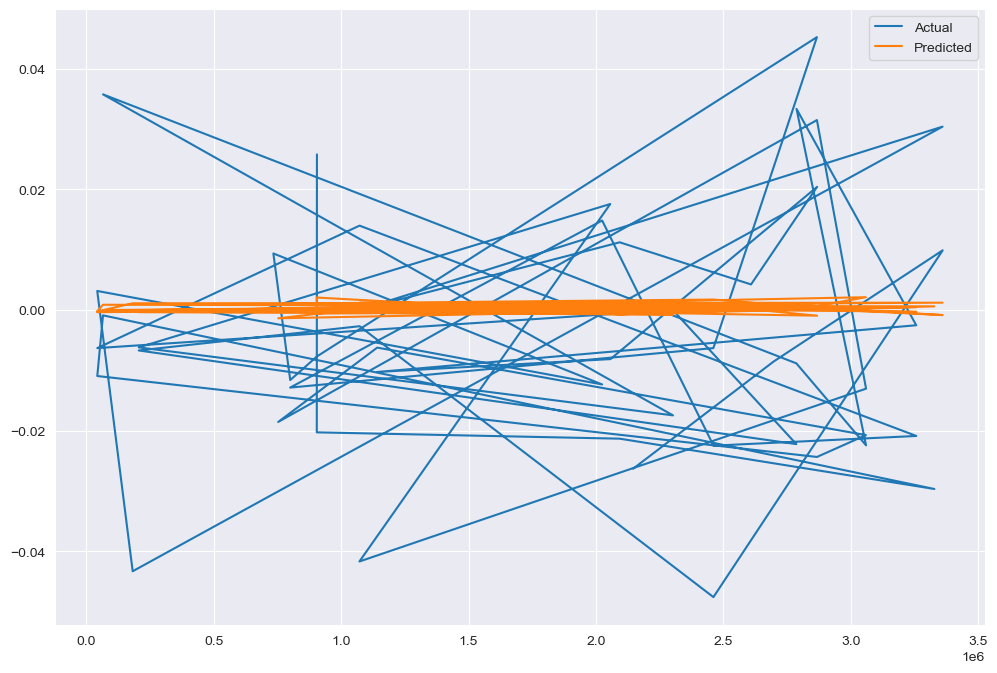

In [32]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(LR[:50])
plt.legend(['Actual' , 'Predicted'])

In [37]:
from sklearn.metrics import r2_score
from keras.losses import mean_absolute_error
from keras.losses import mean_squared_error


def calPerformance(y_true,y_pred):
    model_metrics_name=[mean_absolute_error, mean_squared_error, r2_score]
    tmp_list=[]
    for one in model_metrics_name:
        tmp_score=float(one(y_true,y_pred))
        tmp_list.append([round(tmp_score,3)])
    # print ['explained_variance_score','mean_absolute_error','mean_squared_error','r2_score']
    # print tmp_list
    row=["explained_variance_score","mean_absolute_error","mean_squared_error","r2_score"]

    # fig, ax =plt.subplots(1,1)
    # ax.axis('tight')
    # ax.axis('off')
    # ax.table(cellText=tmp_list,rowLabels=row,loc="center")

    # print(f"explained_variance_score  {tmp_list[0]}")
    print(f"mean_absolute_error  {tmp_list[0]}")
    print(f"mean_squared_error  {tmp_list[1]}")
    print(f"r2_score  {tmp_list[2]}")

In [41]:
calPerformance(y_test,y_pred)

mean_absolute_error  [0.019]
mean_squared_error  [0.002]
r2_score  [-0.001]


## Lstm

In [43]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(units=3, batch_input_shape=(8,2,10), return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=2)
print(model.summary())

Epoch 1/100


ValueError: in user code:

    File "/Users/czc/anaconda3/envs/DataAnalysis/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/Users/czc/anaconda3/envs/DataAnalysis/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/czc/anaconda3/envs/DataAnalysis/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/Users/czc/anaconda3/envs/DataAnalysis/lib/python3.9/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/Users/czc/anaconda3/envs/DataAnalysis/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/czc/anaconda3/envs/DataAnalysis/lib/python3.9/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 2, 10), found shape=(1, 24)
